# **1. Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers

# **2. Loading Dataset**

In [2]:
train_data = pd.read_csv('dataset/train.csv') 
train_data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [3]:
train_data.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0
43956,30,Private,375827,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States,0


In [4]:
print(train_data.shape)

(43957, 15)


In [5]:
test_data = pd.read_csv('dataset/test.csv')
test_data.head(8)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
5,45,Private,148900,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
6,34,Private,118786,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,20,United-States
7,38,Self-emp-inc,222532,Prof-school,15,Never-married,Sales,Not-in-family,White,Female,0,0,45,United-States


In [6]:
print(test_data.shape)

(899, 14)


In [7]:
print('Kolom yang ada di test_data :\n',train_data.columns.values)
print('Panjang : ' , len(train_data.columns))

Kolom yang ada di test_data :
 ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country' 'income_>50K']
Panjang :  15


In [8]:
print('Kolom yang ada di test_data :\n',test_data.columns.values)
print('Panjang : ' , len(test_data.columns))

Kolom yang ada di test_data :
 ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']
Panjang :  14


# **3. Preprocessing data**

In [9]:
train_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


- Handling Null Values 

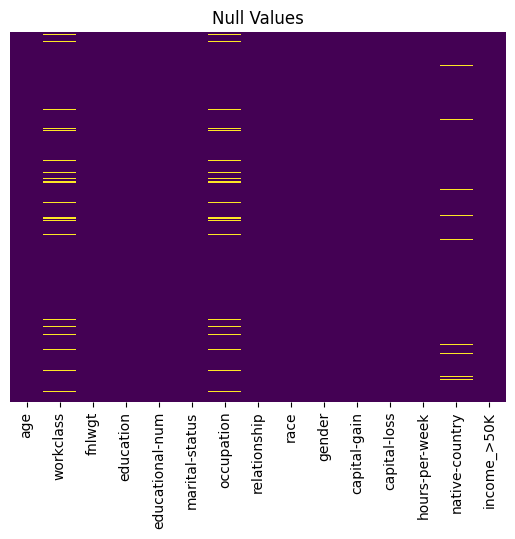

In [10]:
plt.title('Null Values')
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [11]:
print('Jumlah Duplikat : ', train_data.duplicated().sum())
train_data = train_data.drop_duplicates()

Jumlah Duplikat :  45


In [12]:
print('Jumlah Duplikat : ', train_data.duplicated().sum())


Jumlah Duplikat :  0


In [13]:
train_data.isnull().sum()

age                   0
workclass          2494
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2502
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [14]:
train_data.isna().sum()

age                   0
workclass          2494
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2502
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [15]:
train_data = train_data.dropna()
train_data.shape

(40686, 15)

In [16]:
train_data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

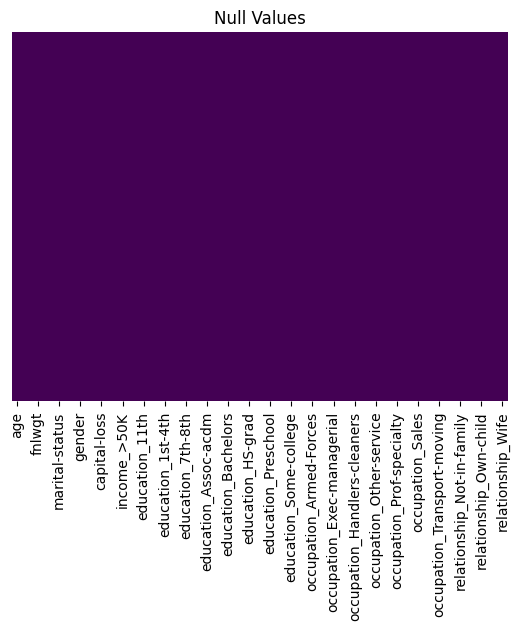

In [97]:
plt.title('Null Values')
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40686 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              40686 non-null  int64 
 1   workclass        40686 non-null  object
 2   fnlwgt           40686 non-null  int64 
 3   education        40686 non-null  object
 4   educational-num  40686 non-null  int64 
 5   marital-status   40686 non-null  object
 6   occupation       40686 non-null  object
 7   relationship     40686 non-null  object
 8   race             40686 non-null  object
 9   gender           40686 non-null  object
 10  capital-gain     40686 non-null  int64 
 11  capital-loss     40686 non-null  int64 
 12  hours-per-week   40686 non-null  int64 
 13  native-country   40686 non-null  object
 14  income_>50K      40686 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [18]:
#df untuk visualisasi
df = train_data.copy()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


- Age

In [19]:
age_bin = [0, 30, 60,100]
age_kategori = ['Dewasa','Tua', 'Sangat Tua']


df['kategori_umur'] = pd.cut(df['age'], bins=age_bin, labels=age_kategori)
df['kategori_umur'].value_counts().sort_values()

kategori_umur
Sangat Tua     2573
Dewasa        12871
Tua           25242
Name: count, dtype: int64

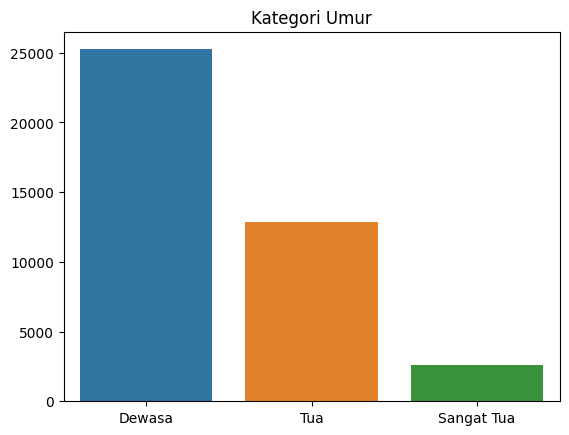

In [20]:

plt.title('Kategori Umur')
sns.barplot(df, x=df['kategori_umur'].value_counts().index.sort_values(), y=df['kategori_umur'].value_counts().values)
plt.xlabel('')
plt.show()

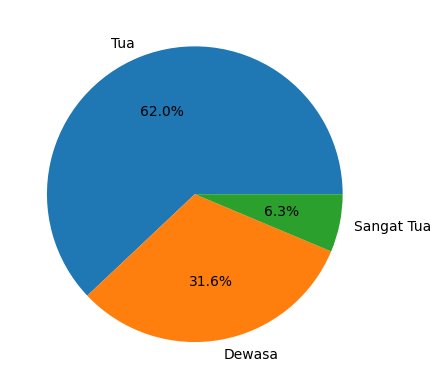

In [21]:
plt.pie(df['kategori_umur'].value_counts().values, labels=df['kategori_umur'].value_counts().index, autopct= '%1.1f%%')
plt.show()

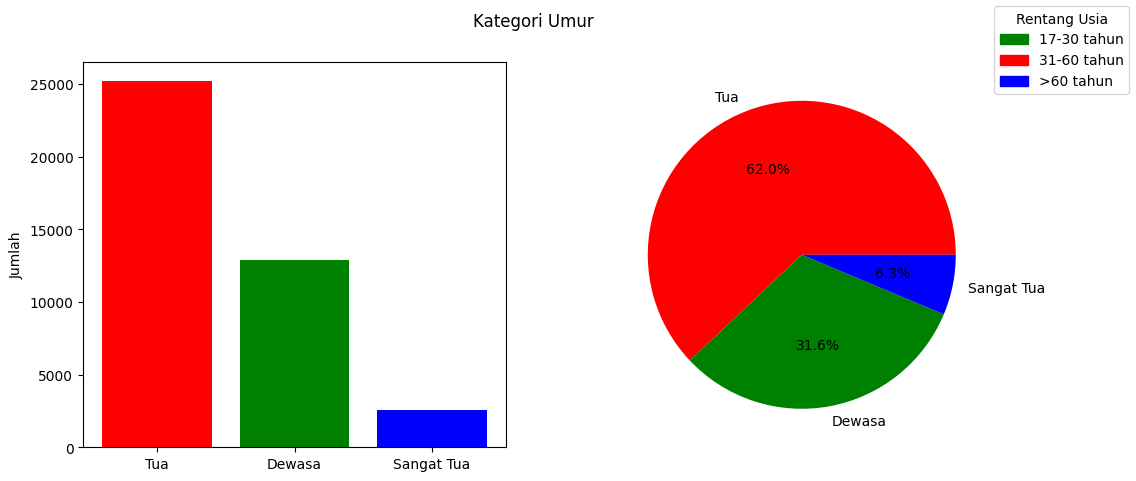

In [22]:
import matplotlib.patches as mpatches

fig, (axs1, axs2) = plt.subplots(1,2, figsize = (12,5))
warna_age = ['r','g','b']
plt.suptitle('Kategori Umur')
# plt.legend(legend_labels, title = 'kategori', loc = 'upper right')
axs1.bar(x=df['kategori_umur'].value_counts().index, height=df['kategori_umur'].value_counts().values, color=warna_age)
axs1.set_ylabel('Jumlah')
axs2.pie(df['kategori_umur'].value_counts().values, labels=df['kategori_umur'].value_counts().index, autopct= '%1.1f%%', colors=warna_age)

legend_handles = [
    mpatches.Patch(color='g', label='17-30 tahun'),
    mpatches.Patch(color='r', label='31-60 tahun'),
    mpatches.Patch(color='b', label='>60 tahun')
]
fig.legend(handles=legend_handles, title='Rentang Usia')

plt.show()

In [23]:
yoy = df.groupby(['kategori_umur','income_>50K'])['kategori_umur'].value_counts()
yoy

kategori_umur  income_>50K
Dewasa         0              12003
               1                868
Tua            0              16666
               1               8576
Sangat Tua     0               1930
               1                643
Name: count, dtype: int64

In [24]:
yoy.index.get_level_values('kategori_umur')

CategoricalIndex(['Dewasa', 'Dewasa', 'Tua', 'Tua', 'Sangat Tua',
                  'Sangat Tua'],
                 categories=['Dewasa', 'Tua', 'Sangat Tua'], ordered=True, dtype='category', name='kategori_umur')

Text(0, 0.5, 'jumlah')

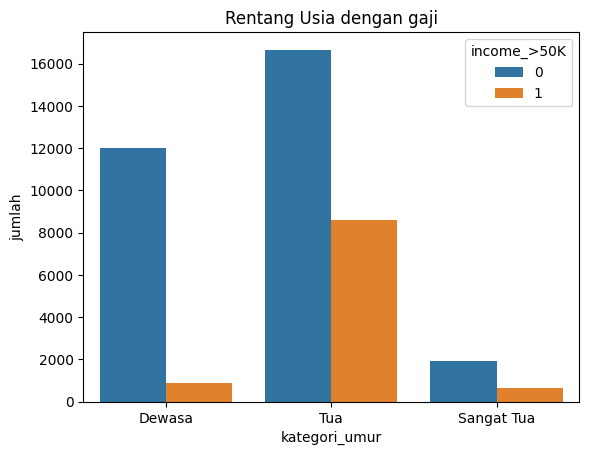

In [25]:
sns.barplot(x=yoy.index.get_level_values('kategori_umur'), y = yoy.values, hue=yoy.index.get_level_values('income_>50K'))
plt.title('Rentang Usia dengan gaji')
plt.ylabel('jumlah')

In [26]:
df.drop(columns='kategori_umur', inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40686 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              40686 non-null  int64 
 1   workclass        40686 non-null  object
 2   fnlwgt           40686 non-null  int64 
 3   education        40686 non-null  object
 4   educational-num  40686 non-null  int64 
 5   marital-status   40686 non-null  object
 6   occupation       40686 non-null  object
 7   relationship     40686 non-null  object
 8   race             40686 non-null  object
 9   gender           40686 non-null  object
 10  capital-gain     40686 non-null  int64 
 11  capital-loss     40686 non-null  int64 
 12  hours-per-week   40686 non-null  int64 
 13  native-country   40686 non-null  object
 14  income_>50K      40686 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


- workclass

In [28]:
df.workclass.unique()

array(['Private', 'State-gov', 'Self-emp-not-inc', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [29]:
tes2 = df.groupby(['workclass','gender'])['workclass'].value_counts()
tes2

workclass         gender
Federal-gov       Female      406
                  Male        856
Local-gov         Female     1127
                  Male       1665
Private           Female    10298
                  Male      19720
Self-emp-inc      Female      171
                  Male       1299
Self-emp-not-inc  Female      550
                  Male       2853
State-gov         Female      667
                  Male       1054
Without-pay       Female        7
                  Male         13
Name: count, dtype: int64

In [30]:
tes3= df.groupby(['workclass','education'])['education'].value_counts()
tes3

workclass    education   
Federal-gov  10th             12
             11th             13
             12th              7
             1st-4th           1
             5th-6th           1
                            ... 
State-gov    Some-college    423
Without-pay  7th-8th           2
             Assoc-acdm        2
             HS-grad          13
             Some-college      3
Name: count, Length: 98, dtype: int64

- final weight

- education

In [ ]:
train_data.education.unique()

- educational num

- marital-status

- occupation

- relationship

<function matplotlib.pyplot.show(close=None, block=None)>

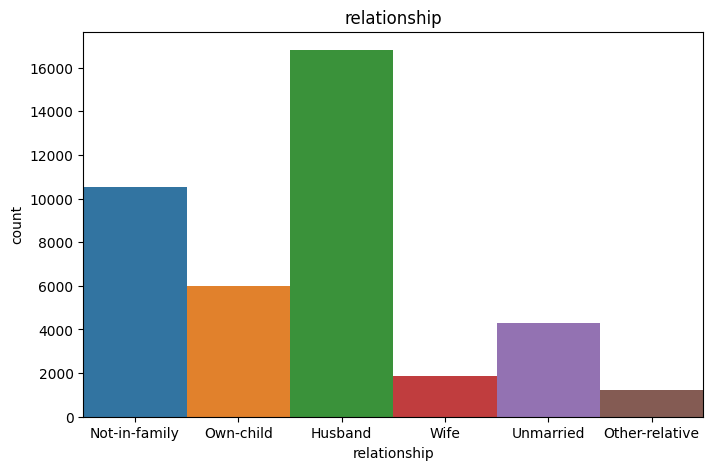

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(data= df, x=df['relationship'], width=1)
plt.title('relationship')
plt.show

- race

- gender

In [32]:
df['gender'].value_counts()

gender
Male      27460
Female    13226
Name: count, dtype: int64

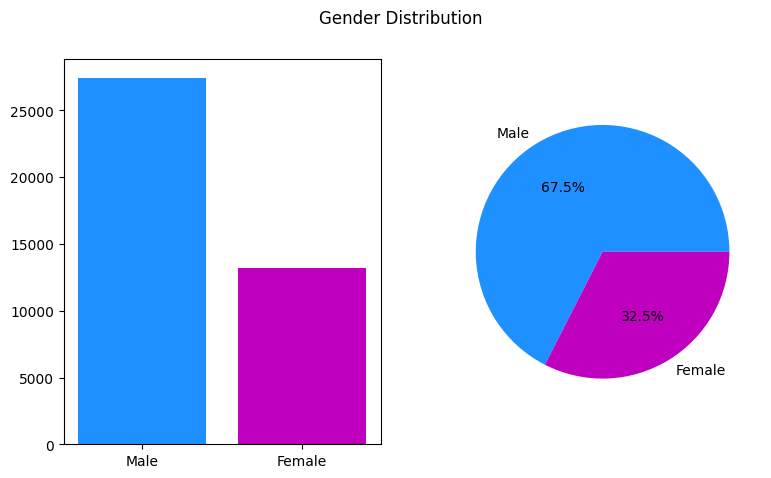

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,5))
gender_counts = df['gender'].value_counts()
ax1.bar(x=gender_counts.index, height=gender_counts.values, color= ['dodgerblue','m'])
ax2.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['dodgerblue','m'])

plt.suptitle('Gender Distribution')

plt.show()


In [34]:
tes1 = df.groupby(['gender','income_>50K'])['gender'].value_counts()
tes1.index.get_level_values('income_>50K')

Index([0, 1, 0, 1], dtype='int64', name='income_>50K')

In [35]:
tes1

gender  income_>50K
Female  0              11722
        1               1504
Male    0              18877
        1               8583
Name: count, dtype: int64

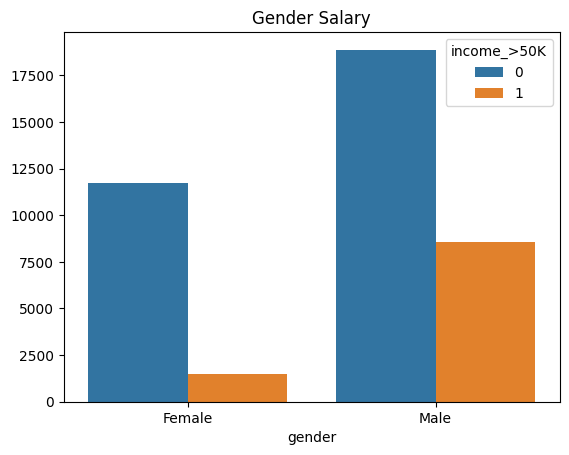

In [36]:
plt.title('Gender Salary')
sns.barplot(x=tes1.index.get_level_values('gender'), y=tes1.values, hue=tes1.index.get_level_values('income_>50K'))
plt.show()

- capital gain

- capital loss

- hours per week

- native country

In [37]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [38]:
df['relationship'].unique()

array(['Not-in-family', 'Own-child', 'Husband', 'Wife', 'Unmarried',
       'Other-relative'], dtype=object)

- Income > 50k

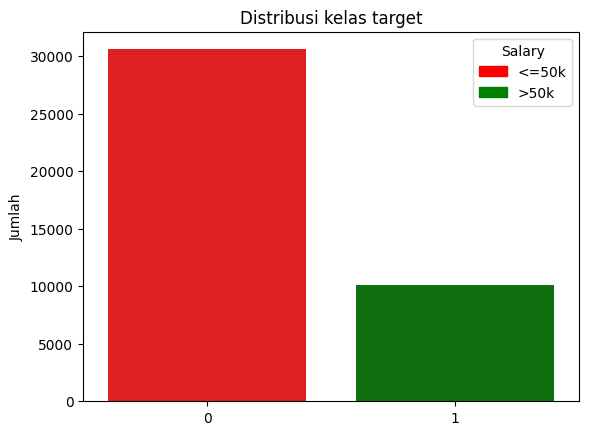

In [39]:
import seaborn as sns

sns.countplot(df, x=df['income_>50K'], palette=['r','g'])
plt.title('Distribusi kelas target')
plt.xlabel('')
plt.ylabel('Jumlah')
target_handles = [
    mpatches.Patch(color = 'r' , label = '<=50k'),
    mpatches.Patch(color ='g', label = '>50k')
]
plt.legend(handles=target_handles, title='Salary')
plt.show()

In [40]:
df['workclass'].unique()

array(['Private', 'State-gov', 'Self-emp-not-inc', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [41]:
df.groupby(['occupation', 'relationship']).size()

occupation        relationship  
Adm-clerical      Husband            818
                  Not-in-family     1513
                  Other-relative     185
                  Own-child         1011
                  Unmarried          960
                                    ... 
Transport-moving  Not-in-family      414
                  Other-relative      33
                  Own-child          204
                  Unmarried          123
                  Wife                23
Length: 82, dtype: int64

In [42]:
df.groupby(['relationship', 'occupation'])['occupation'].count()

relationship  occupation      
Husband       Adm-clerical         818
              Armed-Forces           4
              Craft-repair        3329
              Exec-managerial     2874
              Farming-fishing      746
                                  ... 
Wife          Prof-specialty       419
              Protective-serv       10
              Sales                168
              Tech-support          69
              Transport-moving      23
Name: occupation, Length: 82, dtype: int64

In [43]:
all_occupation = df['occupation'].value_counts()

top_5_occupation = all_occupation.head(10)
other_occupation = all_occupation[10:]
top_5_occupation['others'] = other_occupation.values.sum()
all_occupation


occupation
Craft-repair         5423
Exec-managerial      5412
Prof-specialty       5374
Adm-clerical         4940
Sales                4876
Other-service        4345
Machine-op-inspct    2659
Transport-moving     2085
Handlers-cleaners    1853
Farming-fishing      1333
Tech-support         1295
Protective-serv       866
Priv-house-serv       213
Armed-Forces           12
Name: count, dtype: int64

In [ ]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_data)

# Checking Columns Unique Value

In [44]:
for x in train_data.columns:
    print(x)
    print(train_data[x].unique())
    print('length : ', len(train_data[x].unique()),'\n')

age
[67 17 31 58 25 59 70 35 28 21 30 20 45 76 54 19 44 47 37 27 24 49 36 71
 62 64 53 34 42 26 43 23 56 40 63 50 29 52 33 38 46 32 68 41 80 73 39 57
 51 69 22 18 55 65 60 48 61 66 90 74 72 77 75 88 84 81 83 79 78 82 85 87
 86 89]
length :  74 

workclass
['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
length :  7 

fnlwgt
[366425 244602 174201 ...  68982 116562 375827]
length :  24985 

education
['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 'Assoc-acdm' '1st-4th']
length :  16 

educational-num
[16  8 13  4 10  9  5  6  7 14  1  3 15 11 12  2]
length :  16 

marital-status
['Divorced' 'Never-married' 'Married-civ-spouse' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
length :  7 

occupation
['Exec-managerial' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Machine-op-inspct' 'Sales' 'Handlers-cleaners' 'Farmi

In [45]:
for x in test_data.columns:
    print(x)
    print(test_data[x].unique())
    print('length : ', len(test_data[x].unique()),'\n')

age
[39 32 47 19 46 45 34 38 40 35 23 53 58 42 41 56 48 36 33 26 37 22 57 49
 24 27 25 28 29 30 50 31 20 65 44 60 71 55 62 63 67 66 73 43 75 52 54 59
 21 18 70 90 17 64 61 51 69 68 74 82 80]
length :  61 

workclass
['Self-emp-not-inc' 'Private' 'Self-emp-inc' 'Federal-gov' 'State-gov'
 'Local-gov']
length :  6 

fnlwgt
[327120 123253 232628 374262 311231 148900 118786 222532 270147 184005
  62333  27073 158993 605504 102771 160369  56236  68781 159544 212954
 199501 309311  33234  67874 857532 172230 153066 172571 216867 169329
  34377 150057  88095  22422 190387 441210 234298 248059 193720  33363
 128354 141040  89598 163747 174864 375499 203784 269723 148431 229826
 259532 111398 121313 314310 385646 217296  34568 188711 202191  66278
 140854 242136 187715 150154  58916 188950 113364 597843  26781 213115
 180096 114765  23580 368675 107302 174684 196662  99502  96170 208049
  81038 315449 135158 139031 358533  34307 227856 206707 107991  91608
 386378 218596 121055 242341  98101 355

In [46]:
train_data.replace('Private','Private-company', inplace=True)
train_data.replace('Self-emp-not-inc','Private-company', inplace=True)
train_data.replace('Self-emp-inc','Private-company', inplace=True)
train_data.replace('Self-emp-inc','Private-company', inplace=True)
train_data.replace('Self-emp-inc','Private-company', inplace=True)
train_data.replace('State-gov','Government', inplace=True)
train_data.replace('Federal-gov','Government', inplace=True)
train_data.replace('Local-gov','Government', inplace=True)

test_data.replace('Private','Private-company', inplace=True)
test_data.replace('Self-emp-not-inc','Private-company', inplace=True)
test_data.replace('Self-emp-inc','Private-company', inplace=True)
test_data.replace('Self-emp-inc','Private-company', inplace=True)
test_data.replace('Self-emp-inc','Private-company', inplace=True)
test_data.replace('State-gov','Government', inplace=True)
test_data.replace('Federal-gov','Government', inplace=True)
test_data.replace('Local-gov','Government', inplace=True)

In [47]:
for x in train_data.columns:
    print(x)
    print(train_data[x].unique())
    print('length : ', len(train_data[x].unique()),'\n')

age
[67 17 31 58 25 59 70 35 28 21 30 20 45 76 54 19 44 47 37 27 24 49 36 71
 62 64 53 34 42 26 43 23 56 40 63 50 29 52 33 38 46 32 68 41 80 73 39 57
 51 69 22 18 55 65 60 48 61 66 90 74 72 77 75 88 84 81 83 79 78 82 85 87
 86 89]
length :  74 

workclass
['Private-company' 'Government' 'Without-pay']
length :  3 

fnlwgt
[366425 244602 174201 ...  68982 116562 375827]
length :  24985 

education
['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 'Assoc-acdm' '1st-4th']
length :  16 

educational-num
[16  8 13  4 10  9  5  6  7 14  1  3 15 11 12  2]
length :  16 

marital-status
['Divorced' 'Never-married' 'Married-civ-spouse' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
length :  7 

occupation
['Exec-managerial' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Machine-op-inspct' 'Sales' 'Handlers-cleaners' 'Farming-fishing'
 'Protective-serv' 'Prof-specialty' 'Cra

In [48]:
for x in test_data.columns:
    print(x)
    print(test_data[x].unique())
    print('length : ', len(test_data[x].unique()),'\n')

age
[39 32 47 19 46 45 34 38 40 35 23 53 58 42 41 56 48 36 33 26 37 22 57 49
 24 27 25 28 29 30 50 31 20 65 44 60 71 55 62 63 67 66 73 43 75 52 54 59
 21 18 70 90 17 64 61 51 69 68 74 82 80]
length :  61 

workclass
['Private-company' 'Government']
length :  2 

fnlwgt
[327120 123253 232628 374262 311231 148900 118786 222532 270147 184005
  62333  27073 158993 605504 102771 160369  56236  68781 159544 212954
 199501 309311  33234  67874 857532 172230 153066 172571 216867 169329
  34377 150057  88095  22422 190387 441210 234298 248059 193720  33363
 128354 141040  89598 163747 174864 375499 203784 269723 148431 229826
 259532 111398 121313 314310 385646 217296  34568 188711 202191  66278
 140854 242136 187715 150154  58916 188950 113364 597843  26781 213115
 180096 114765  23580 368675 107302 174684 196662  99502  96170 208049
  81038 315449 135158 139031 358533  34307 227856 206707 107991  91608
 386378 218596 121055 242341  98101 355856 267790 251474 246891 298249
 204098 220283 19116

- age : y
- workclass :
- fnlwgt : y
- edu : 
- edu-num : y
- marit-status : y
- occupation :
- relationship :
- race : y
- gender : y
- cap-gain : y
- cap-loss : y
- hr-aweek : y
- native-country :

In [54]:
train_data.drop(columns='native-country', inplace=True)
test_data.drop(columns='native-country', inplace=True)
test_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype='object')

In [55]:
col_to_scale = ['age','fnlwgt','educational-num','capital-gain', 'capital-loss','hours-per-week']

mm_scaler = MinMaxScaler()
train_data[col_to_scale] = mm_scaler.fit_transform(train_data[col_to_scale])
test_data[col_to_scale] = mm_scaler.fit_transform(test_data[col_to_scale])

train_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income_>50K
0,0.684932,Private-company,0.238967,Doctorate,1.000000,Divorced,Exec-managerial,Not-in-family,White,Male,1.0,0.0,0.602041,1
1,0.000000,Private-company,0.156482,12th,0.466667,Never-married,Other-service,Own-child,White,Male,0.0,0.0,0.142857,0
2,0.191781,Private-company,0.108814,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.397959,1
3,0.561644,Government,0.065479,7th-8th,0.200000,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,0.397959,0
4,0.109589,Government,0.091919,Some-college,0.600000,Never-married,Other-service,Not-in-family,Black,Male,0.0,0.0,0.397959,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0.479452,Private-company,0.037572,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.500000,1
43953,0.027397,Private-company,0.069788,HS-grad,0.533333,Never-married,Other-service,Own-child,White,Female,0.0,0.0,0.397959,0
43954,0.178082,Private-company,0.124893,Some-college,0.600000,Divorced,Sales,Not-in-family,White,Male,0.0,0.0,0.581633,0
43955,0.397260,Private-company,0.057140,Bachelors,0.800000,Never-married,Sales,Not-in-family,White,Female,0.0,0.0,0.346939,0


In [56]:
test_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
0,0.301370,Private-company,0.365581,HS-grad,0.533333,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,0.391753
1,0.205479,Private-company,0.121739,Assoc-acdm,0.733333,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,0.412371
2,0.410959,Private-company,0.252561,HS-grad,0.533333,Married-civ-spouse,Craft-repair,Husband,Black,Male,0.0,0.0,0.391753
3,0.027397,Private-company,0.421967,12th,0.466667,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,0.185567
4,0.397260,Private-company,0.346577,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,0.391753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.136986,Private-company,0.336021,Masters,0.866667,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,0.546392
895,0.000000,Private-company,0.235213,11th,0.400000,Never-married,Sales,Own-child,White,Female,0.0,0.0,0.185567
896,0.095890,Private-company,0.126387,Some-college,0.600000,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,0.391753
897,0.246575,Private-company,0.133252,Some-college,0.600000,Married-civ-spouse,Tech-support,Husband,White,Male,0.0,0.0,0.391753


In [57]:
train_data['marital-status'].replace('Divorced', 'Not-married', inplace=True)
train_data['marital-status'].replace('Never-married', 'Not-married', inplace=True)
train_data['marital-status'].replace('Married-civ-spouse', 'Married', inplace=True)
train_data['marital-status'].replace('Separated', 'Not-married', inplace=True)
train_data['marital-status'].replace('Married-spouse-absent', 'Not-married', inplace=True)
train_data['marital-status'].replace('Married-AF-spouse', 'Married', inplace=True)
train_data['marital-status'].replace('Divorced', 'Not-married', inplace=True)

test_data['marital-status'].replace('Divorced', 'Not-married', inplace=True)
test_data['marital-status'].replace('Never-married', 'Not-married', inplace=True)
test_data['marital-status'].replace('Married-civ-spouse', 'Married', inplace=True)
test_data['marital-status'].replace('Separated', 'Not-married', inplace=True)
test_data['marital-status'].replace('Married-spouse-absent', 'Not-married', inplace=True)
test_data['marital-status'].replace('Married-AF-spouse', 'Married', inplace=True)
test_data['marital-status'].replace('Divorced', 'Not-married', inplace=True)


In [58]:
LE = LabelEncoder()

col_to_le = ['workclass','marital-status', 'race', 'gender']

for col in col_to_le:
    train_data[col] = LE.fit_transform(train_data[col])
    test_data[col] = LE.fit_transform(test_data[col])

In [59]:
train_data.workclass.value_counts()

workclass
1    34891
0     5775
2       20
Name: count, dtype: int64

In [60]:
test_data.workclass.value_counts()

workclass
1    759
0    140
Name: count, dtype: int64

In [61]:
train_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income_>50K
0,0.684932,1,0.238967,Doctorate,1.000000,1,Exec-managerial,Not-in-family,4,1,1.0,0.0,0.602041,1
1,0.000000,1,0.156482,12th,0.466667,1,Other-service,Own-child,4,1,0.0,0.0,0.142857,0
2,0.191781,1,0.108814,Bachelors,0.800000,0,Exec-managerial,Husband,4,1,0.0,0.0,0.397959,1
3,0.561644,0,0.065479,7th-8th,0.200000,0,Transport-moving,Husband,4,1,0.0,0.0,0.397959,0
4,0.109589,0,0.091919,Some-college,0.600000,1,Other-service,Not-in-family,2,1,0.0,0.0,0.397959,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0.479452,1,0.037572,Bachelors,0.800000,0,Exec-managerial,Husband,4,1,0.0,0.0,0.500000,1
43953,0.027397,1,0.069788,HS-grad,0.533333,1,Other-service,Own-child,4,0,0.0,0.0,0.397959,0
43954,0.178082,1,0.124893,Some-college,0.600000,1,Sales,Not-in-family,4,1,0.0,0.0,0.581633,0
43955,0.397260,1,0.057140,Bachelors,0.800000,1,Sales,Not-in-family,4,0,0.0,0.0,0.346939,0


In [62]:
test_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
0,0.301370,1,0.365581,HS-grad,0.533333,0,Craft-repair,Husband,4,1,0.0,0.0,0.391753
1,0.205479,1,0.121739,Assoc-acdm,0.733333,0,Craft-repair,Husband,4,1,0.0,0.0,0.412371
2,0.410959,1,0.252561,HS-grad,0.533333,0,Craft-repair,Husband,2,1,0.0,0.0,0.391753
3,0.027397,1,0.421967,12th,0.466667,1,Handlers-cleaners,Own-child,4,1,0.0,0.0,0.185567
4,0.397260,1,0.346577,HS-grad,0.533333,0,Farming-fishing,Husband,4,1,0.0,0.0,0.391753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.136986,1,0.336021,Masters,0.866667,0,Prof-specialty,Husband,4,1,0.0,0.0,0.546392
895,0.000000,1,0.235213,11th,0.400000,1,Sales,Own-child,4,0,0.0,0.0,0.185567
896,0.095890,1,0.126387,Some-college,0.600000,1,Adm-clerical,Own-child,4,0,0.0,0.0,0.391753
897,0.246575,1,0.133252,Some-college,0.600000,0,Tech-support,Husband,4,1,0.0,0.0,0.391753


In [63]:
col_to_OHE = ['education', 'occupation', 'relationship']

train_data = pd.get_dummies(train_data, columns=col_to_OHE)
test_data = pd.get_dummies(test_data, columns=col_to_OHE)

In [64]:
train_data = train_data.astype('float32')
train_data

,age,workclass,fnlwgt,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0.684932,1.0,0.238967,1.000000,1.0,4.0,1.0,1.0,0.0,0.602041,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,1.0,0.156482,0.466667,1.0,4.0,1.0,0.0,0.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.191781,1.0,0.108814,0.800000,0.0,4.0,1.0,0.0,0.0,0.397959,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.561644,0.0,0.065479,0.200000,0.0,4.0,1.0,0.0,0.0,0.397959,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.109589,0.0,0.091919,0.600000,1.0,2.0,1.0,0.0,0.0,0.397959,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0.479452,1.0,0.037572,0.800000,0.0,4.0,1.0,0.0,0.0,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
43953,0.027397,1.0,0.069788,0.533333,1.0,4.0,0.0,0.0,0.0,0.397959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43954,0.178082,1.0,0.124893,0.600000,1.0,4.0,1.0,0.0,0.0,0.581633,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
43955,0.397260,1.0,0.057140,0.800000,1.0,4.0,0.0,0.0,0.0,0.346939,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [66]:
test_data =  test_data.astype('float32')
test_data

,age,workclass,fnlwgt,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0.301370,1.0,0.365581,0.533333,0.0,4.0,1.0,0.0,0.0,0.391753,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.205479,1.0,0.121739,0.733333,0.0,4.0,1.0,0.0,0.0,0.412371,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.410959,1.0,0.252561,0.533333,0.0,2.0,1.0,0.0,0.0,0.391753,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.027397,1.0,0.421967,0.466667,1.0,4.0,1.0,0.0,0.0,0.185567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.397260,1.0,0.346577,0.533333,0.0,4.0,1.0,0.0,0.0,0.391753,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.136986,1.0,0.336021,0.866667,0.0,4.0,1.0,0.0,0.0,0.546392,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
895,0.000000,1.0,0.235213,0.400000,1.0,4.0,0.0,0.0,0.0,0.185567,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
896,0.095890,1.0,0.126387,0.600000,1.0,4.0,0.0,0.0,0.0,0.391753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
897,0.246575,1.0,0.133252,0.600000,0.0,4.0,1.0,0.0,0.0,0.391753,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [67]:
train_data.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
       'income_>50K', 'education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'r

In [68]:
X = train_data.drop(columns=['income_>50K'])
Y = train_data['income_>50K']

In [69]:
X.corr()

,age,workclass,fnlwgt,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
age,1.000000,-0.084665,-0.074729,0.040355,-0.199483,0.021147,0.083499,0.078711,0.059361,0.101421,...,0.004357,-0.029487,-0.019396,0.039803,0.304336,-0.020887,-0.069177,-0.417629,0.045589,0.022995
workclass,-0.084665,1.000000,0.012967,-0.159376,0.004283,0.067349,0.048319,0.015737,-0.011986,0.013630,...,-0.229479,0.139442,-0.013135,0.023231,-0.001439,-0.013105,0.026547,0.052873,-0.035291,-0.028249
fnlwgt,-0.074729,0.012967,1.000000,-0.044559,0.016229,-0.027468,0.027863,-0.003553,-0.006862,-0.017097,...,0.015095,0.001282,0.002118,0.004546,-0.020169,0.004483,0.022562,0.017353,0.005170,-0.017167
educational-num,0.040355,-0.159376,-0.044559,1.000000,-0.088796,0.030124,0.002371,0.128964,0.080987,0.148870,...,-0.000282,0.031751,0.059857,-0.129400,0.068078,0.062708,-0.090578,-0.098501,-0.060045,0.037074
marital-status,-0.199483,0.004283,0.016229,-0.088796,1.000000,-0.086339,-0.450126,-0.074073,-0.068451,-0.230358,...,-0.040626,0.006880,0.012934,-0.076322,-0.855977,0.531848,0.107816,0.318419,0.341112,-0.224856
race,0.021147,0.067349,-0.027468,0.030124,-0.086339,1.000000,0.089384,0.013900,0.021504,0.042827,...,-0.013391,0.034596,-0.003810,-0.001971,0.102890,0.010628,-0.066719,-0.018498,-0.111702,-0.014489
gender,0.083499,0.048319,0.027863,0.002371,-0.450126,0.089384,1.000000,0.046245,0.044102,0.230991,...,0.061628,-0.020508,-0.026911,0.134403,0.582150,-0.175529,-0.047318,-0.103907,-0.319706,-0.317254
capital-gain,0.078711,0.015737,-0.003553,0.128964,-0.074073,0.013900,0.046245,1.000000,-0.032174,0.084652,...,-0.008491,0.007029,-0.010013,-0.021023,0.073761,-0.022240,-0.020749,-0.050175,-0.028208,0.016085
capital-loss,0.059361,-0.011986,-0.006862,0.080987,-0.068451,0.021504,0.044102,-0.032174,1.000000,0.054942,...,0.001209,0.008836,0.000345,-0.005088,0.069550,-0.015224,-0.014481,-0.052131,-0.032642,0.016033
hours-per-week,0.101421,0.013630,-0.017097,0.148870,-0.230358,0.042827,0.230991,0.084652,0.054942,1.000000,...,0.022176,-0.004118,-0.019556,0.076096,0.257217,0.004694,-0.055725,-0.262862,-0.042585,-0.062350


In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [73]:
x_train.shape[1]

46

In [74]:
# Build the Neural Network model
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(x_train.shape[1], )),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
32548/32548 [==============================] - 19s 582us/step - loss: 0.3652 - accuracy: 0.8305
Epoch 2/100
32548/32548 [==============================] - 19s 583us/step - loss: 0.3413 - accuracy: 0.8418
Epoch 3/100
32548/32548 [==============================] - 19s 586us/step - loss: 0.3366 - accuracy: 0.8420
Epoch 4/100
32548/32548 [==============================] - 19s 585us/step - loss: 0.3343 - accuracy: 0.8441
Epoch 5/100
32548/32548 [==============================] - 19s 584us/step - loss: 0.3313 - accuracy: 0.8456
Epoch 6/100
32548/32548 [==============================] - 19s 582us/step - loss: 0.3295 - accuracy: 0.8475
Epoch 7/100
32548/32548 [==============================] - 19s 581us/step - loss: 0.3286 - accuracy: 0.8463
Epoch 8/100
32548/32548 [==============================] - 19s 582us/step - loss: 0.3269 - accuracy: 0.8476
Epoch 9/100
32548/32548 [==============================] - 19s 584us/step - loss: 0.3255 - accuracy: 0.8479
Epoch 10/100
32548/32548 [==

In [76]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

Test loss: 0.3126, Test accuracy: 0.8549


In [77]:
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)

255/255 [==============================] - 0s 497us/step


In [78]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.95      0.91      6137
     Class 1       0.78      0.57      0.66      2001

    accuracy                           0.85      8138
   macro avg       0.82      0.76      0.78      8138
weighted avg       0.85      0.85      0.85      8138



In [79]:
y_preds = model.predict(test_data)
y_preds_classes = np.round(y_preds)

29/29 [==============================] - 0s 743us/step


In [94]:
hasil =pd.DataFrame(y_preds_classes)
hasil

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
894,1.0
895,0.0
896,0.0
897,0.0


In [96]:
hasil.value_counts()

0.0    718
1.0    181
Name: count, dtype: int64

In [95]:
res = pd.concat([test_data,hasil], axis =1)
res

,age,workclass,fnlwgt,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,0
0,0.301370,1.0,0.365581,0.533333,0.0,4.0,1.0,0.0,0.0,0.391753,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.205479,1.0,0.121739,0.733333,0.0,4.0,1.0,0.0,0.0,0.412371,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410959,1.0,0.252561,0.533333,0.0,2.0,1.0,0.0,0.0,0.391753,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.027397,1.0,0.421967,0.466667,1.0,4.0,1.0,0.0,0.0,0.185567,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.397260,1.0,0.346577,0.533333,0.0,4.0,1.0,0.0,0.0,0.391753,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.136986,1.0,0.336021,0.866667,0.0,4.0,1.0,0.0,0.0,0.546392,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
895,0.000000,1.0,0.235213,0.400000,1.0,4.0,0.0,0.0,0.0,0.185567,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
896,0.095890,1.0,0.126387,0.600000,1.0,4.0,0.0,0.0,0.0,0.391753,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
897,0.246575,1.0,0.133252,0.600000,0.0,4.0,1.0,0.0,0.0,0.391753,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
